In [131]:
import pandas as pd
import numpy as np

csv = 'realestate.csv'

df = pd.read_csv(csv)
df.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


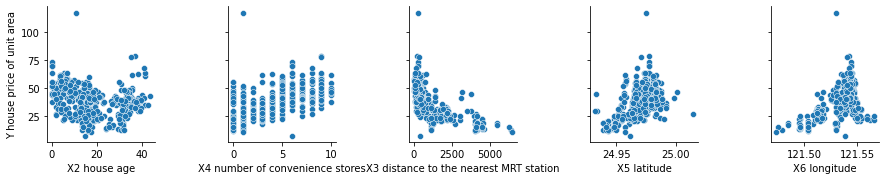

In [132]:
import seaborn as sns
sns.pairplot(data = df, x_vars=['X2 house age', 'X4 number of convenience stores', 'X3 distance to the nearest MRT station', 'X5 latitude', 'X6 longitude'], y_vars = ['Y house price of unit area'])

In [133]:
#need to assign zones with longitutde and latidude 
#USE NP SELECT

(df['X5 latitude'].describe())
(df['X6 longitude'].describe())
lat_int = (df['X5 latitude'].max() - df['X5 latitude'].min() ) / 5
long_int = (df['X6 longitude'].max() - df['X6 longitude'].min()) / 5
print(df['X5 latitude'].max(), lat_int, df['X6 longitude'].max(), long_int)

conds = [(df['X5 latitude'] >= (df['X5 latitude'].max() - (1 * lat_int) )),
        (df['X5 latitude'] >= (df['X5 latitude'].max() - (2 * lat_int) )),
       (df['X5 latitude'] >= (df['X5 latitude'].max() - (3 * lat_int) )),
      (df['X5 latitude'] >= (df['X5 latitude'].max() - (4 * lat_int) )),
     (df['X5 latitude'] >= (df['X5 latitude'].max() - (5 * lat_int) ))]
         
         
               
l = []
l.extend(range(1,6))
choices = l

df['Xzone'] = np.select(conds, choices)

conds2 = [(df['X6 longitude'] >= (df['X6 longitude'].max() - (1 * long_int) )),
          (df['X6 longitude'] >= (df['X6 longitude'].max() - (2 * long_int) )),
          (df['X6 longitude'] >= (df['X6 longitude'].max() - (3 * long_int) )),
          (df['X6 longitude'] >= (df['X6 longitude'].max() - (4 * long_int) )),
          (df['X6 longitude'] >= (df['X6 longitude'].max() - (5 * long_int) ))]

l2 = ['A', 'B', 'C', 'D', 'E']

df['Yzone'] = np.select(conds2, l2)

df['Yzone'].value_counts()


df['Zone'] = df['Xzone'].astype(str) + df['Yzone'] 

df.head(5)




25.01459 0.016503999999999762 121.56626999999999 0.018547999999995568


,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area,Xzone,Yzone,Zone
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9,2,B,2B
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2,3,B,3B
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3,2,B,2B
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8,2,B,2B
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1,3,B,3B


In [134]:
df.drop(['Xzone', 'Yzone'], axis =1 , inplace = True)
cols = ['No', 'Month', 'Age', 'Distance_MRT','Store_Count','Latitude','Longitude', 'Price_Unit', 'Zone']


In [135]:
df.columns = cols
df.head()

,No,Month,Age,Distance_MRT,Store_Count,Latitude,Longitude,Price_Unit,Zone
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9,2B
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2,3B
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3,2B
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8,2B
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1,3B


                            OLS Regression Results                            
Dep. Variable:             Price_Unit   R-squared:                       0.044
Model:                            OLS   Adj. R-squared:                  0.042
Method:                 Least Squares   F-statistic:                     19.11
Date:                Mon, 08 Mar 2021   Prob (F-statistic):           1.56e-05
Time:                        06:36:18   Log-Likelihood:                -1658.3
No. Observations:                 414   AIC:                             3321.
Df Residuals:                     412   BIC:                             3329.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     42.4347      1.211     35.042      0.0

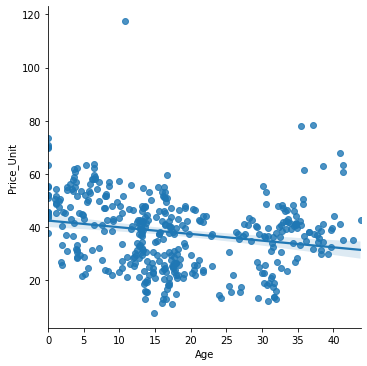

In [136]:
from statsmodels.formula.api import ols

sns.lmplot(x = 'Age', y = 'Price_Unit', data = df)
model = ols('Price_Unit ~ Age', data = df).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:             Price_Unit   R-squared:                       0.454
Model:                            OLS   Adj. R-squared:                  0.452
Method:                 Least Squares   F-statistic:                     342.2
Date:                Mon, 08 Mar 2021   Prob (F-statistic):           4.64e-56
Time:                        06:36:18   Log-Likelihood:                -1542.5
No. Observations:                 414   AIC:                             3089.
Df Residuals:                     412   BIC:                             3097.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       45.8514      0.653     70.258   

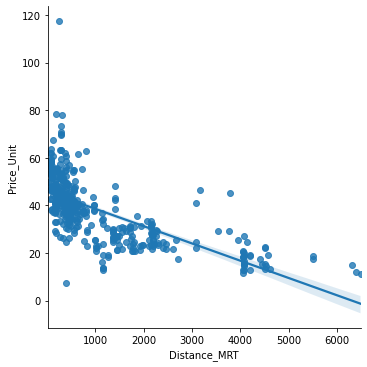

In [137]:
sns.lmplot(x = 'Distance_MRT', y = 'Price_Unit', data = df)
model2 = ols('Price_Unit ~ Distance_MRT', data = df).fit()
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:             Price_Unit   R-squared:                       0.539
Model:                            OLS   Adj. R-squared:                  0.538
Method:                 Least Squares   F-statistic:                     482.2
Date:                Mon, 08 Mar 2021   Prob (F-statistic):           2.52e-71
Time:                        06:36:19   Log-Likelihood:                -1507.3
No. Observations:                 414   AIC:                             3019.
Df Residuals:                     412   BIC:                             3027.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           95.0169      2.637  

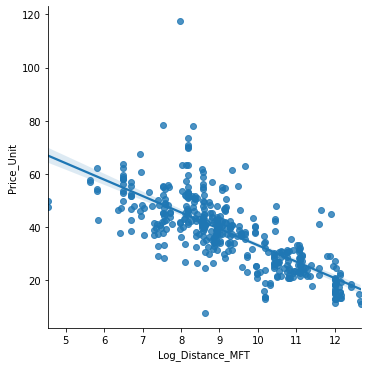

In [138]:
import math
df['Log_Distance_MFT'] = np.log2(df['Distance_MRT'])

sns.lmplot(x = 'Log_Distance_MFT', y = 'Price_Unit', data = df)
model3 = ols('Price_Unit ~ Log_Distance_MFT', data = df).fit()
print(model3.summary())


                            OLS Regression Results                            
Dep. Variable:             Price_Unit   R-squared:                       0.590
Model:                            OLS   Adj. R-squared:                  0.578
Method:                 Least Squares   F-statistic:                     48.05
Date:                Mon, 08 Mar 2021   Prob (F-statistic):           5.32e-70
Time:                        06:36:19   Log-Likelihood:                -1483.2
No. Observations:                 414   AIC:                             2992.
Df Residuals:                     401   BIC:                             3045.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               85.7699 

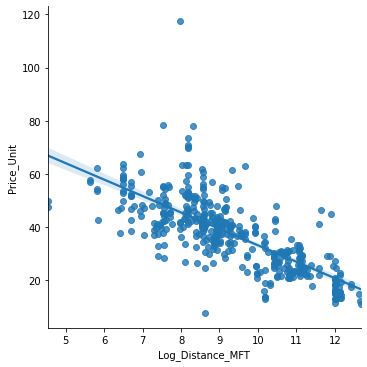

In [139]:
sns.lmplot(x = 'Log_Distance_MFT', y = 'Price_Unit', data = df)
model4 = ols('Price_Unit ~ Log_Distance_MFT + Age  + C(Store_Count)', data = df).fit()
print(model4.summary())


(414, 10)
(412, 10)


,No,Month,Age,Distance_MRT,Store_Count,Latitude,Longitude,Price_Unit,Zone,Log_Distance_MFT
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9,2B,6.407333
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2,3B,8.260189
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3,2B,9.134387
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8,2B,9.134387
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1,3B,8.609431


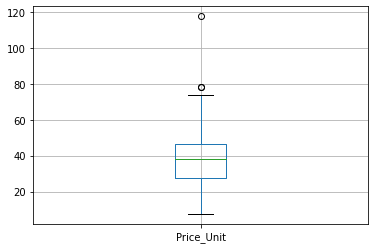

In [140]:
print(df.shape)
df.boxplot('Price_Unit')
df2 = df.drop(df[df.Price_Unit > 78].index)
print(df2.shape)
df2.head()

                            OLS Regression Results                            
Dep. Variable:             Price_Unit   R-squared:                       0.641
Model:                            OLS   Adj. R-squared:                  0.630
Method:                 Least Squares   F-statistic:                     59.35
Date:                Mon, 08 Mar 2021   Prob (F-statistic):           5.67e-81
Time:                        06:36:20   Log-Likelihood:                -1426.9
No. Observations:                 412   AIC:                             2880.
Df Residuals:                     399   BIC:                             2932.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               82.6508 

5     67
0     67
3     46
1     45
6     37
7     31
4     31
8     30
9     24
2     24
10    10
Name: Store_Count, dtype: int64

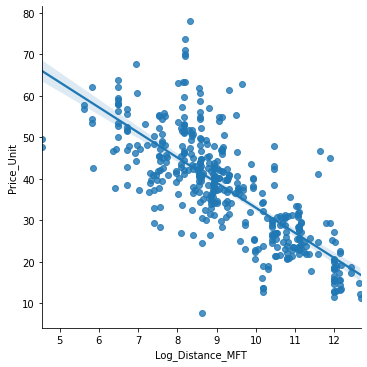

In [141]:
sns.lmplot(x = 'Log_Distance_MFT', y = 'Price_Unit', data = df2)
model5 = ols('Price_Unit ~ Log_Distance_MFT + Age  + C(Store_Count)', data = df2).fit()
print(model5.summary())
(df2['Store_Count'].value_counts())


In [142]:
#categorical sampling errors are too high.  Combine terms to lower SE

conditions = [(df2['Store_Count'] >= 8),
             (df2['Store_Count'] < 8)]
               

list2 = ['High', 'Low']

df2['Store_Count_ver2'] = np.select(conditions, list2)

df2.head()

,No,Month,Age,Distance_MRT,Store_Count,Latitude,Longitude,Price_Unit,Zone,Log_Distance_MFT,Store_Count_ver2
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9,2B,6.407333,High
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2,3B,8.260189,High
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3,2B,9.134387,Low
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8,2B,9.134387,Low
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1,3B,8.609431,Low


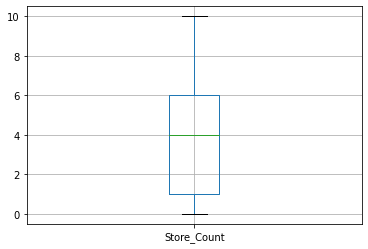

In [143]:
df2.boxplot('Store_Count')

In [144]:
model6 = ols('Price_Unit ~ Log_Distance_MFT + Age  + Latitude', data = df2).fit()
print(model6.summary())



                            OLS Regression Results                            
Dep. Variable:             Price_Unit   R-squared:                       0.676
Model:                            OLS   Adj. R-squared:                  0.673
Method:                 Least Squares   F-statistic:                     283.3
Date:                Mon, 08 Mar 2021   Prob (F-statistic):           2.40e-99
Time:                        06:36:21   Log-Likelihood:                -1406.0
No. Observations:                 412   AIC:                             2820.
Df Residuals:                     408   BIC:                             2836.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept        -7692.0095    825.990  

In [171]:
#okay last check, does month sold impact price?

df2.head(100)

df2['Year'] = df2['Month'].astype(str).str[:4]
df2.head()
df2['Month_New'] = df2['Month'].astype(str).str[4:]
df2.head()
df2['Month_New'] = df2['Month_New'].astype(str).str[:4]
df2.head()
df2['Month_New'] = df2['Month_New'].astype(float)

conditions3 = [(df2['Month_New'] >= .75),
              (df2['Month_New'] >= .5),
              (df2['Month_New'] >= .25),
              (df2['Month_New'] >= 0)]

list3 = ['Fall', 'Summer', 'Spring', 'Winter']

df2['Season'] = np.select(conditions3, list3)
df2['Season'].value_counts()


Spring    117
Summer    100
Winter     99
Fall       96
Name: Season, dtype: int64

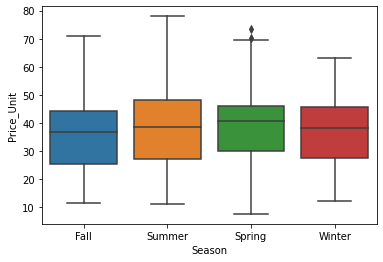

In [180]:
#sns.lmplot(x = 'Log_Distance_MFT', y = 'Price_Unit', data = df2)
#sns.lmplot(x = 'Age', y = 'Price_Unit', data = df2)

sns.boxplot(x = 'Season', y = 'Price_Unit', data = df2)


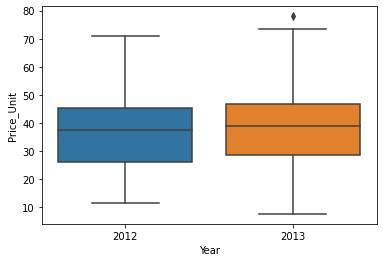

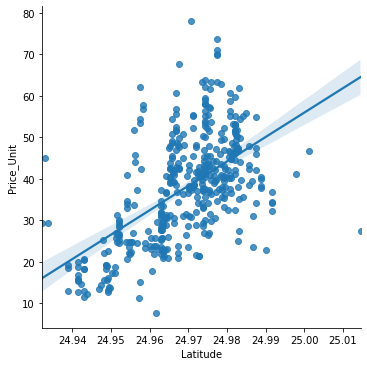

In [179]:
sns.boxplot(x = 'Year', y = 'Price_Unit', data = df2)
sns.lmplot(x = 'Latitude', y = 'Price_Unit', data = df2)

In [176]:
model7 = ols('Price_Unit ~ Log_Distance_MFT + Age  + Latitude + C(Year)', data = df2).fit()
print(model7.summary())

                            OLS Regression Results                            
Dep. Variable:             Price_Unit   R-squared:                       0.690
Model:                            OLS   Adj. R-squared:                  0.687
Method:                 Least Squares   F-statistic:                     226.2
Date:                Mon, 08 Mar 2021   Prob (F-statistic):          5.18e-102
Time:                        06:53:27   Log-Likelihood:                -1396.8
No. Observations:                 412   AIC:                             2804.
Df Residuals:                     407   BIC:                             2824.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept        -7566.0012    809.313  

In [ ]:
#Linear Regression Final Model

#Y = -7566.0012 + -4.9273(Log2 Distance from MFT) + -0.2324(Age of House) + 306.4181(Latitude Position)
#Sally want to know what her nieghbor sold his house for, the data for the house are the following.  The house is 420 M away from a MFT station.  The House in 23 Years old. The house sits at a latitude for 24.975


